## Analyze A/B Test Results

This project will assure you have mastered some of the subjects covered in the statistics


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
np.random.seed(43)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
display(df.head())


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print('data shape:',df.shape)

data shape: (294478, 5)


c. The number of unique users in the dataset.

In [4]:
print(' The number of unique users:',df['user_id'].nunique())


 The number of unique users: 290584


d. The proportion of users converted.

In [5]:
display('The proportion of users converted:',df['converted'].value_counts(normalize=True))

'The proportion of users converted:'

0    0.880341
1    0.119659
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('group == "treatment" and landing_page != "new_page" or group == "control" and landing_page == "new_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isna().any().any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.

a. clear your data of misleading records and Store your new dataframe in df2.


In [8]:
df2=df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"')


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

``3.`` Use df2 and the cells below to answer questions the following questions.

a. How many unique **user_id**s are in **df2**?

In [10]:
print(' The number of unique users:',df['user_id'].nunique())


 The number of unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(subset=['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(subset=['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset=['user_id'],inplace=True)
df2.shape

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(290584, 5)

`4.` Use df2 in the cells below to answer the following questions.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2[df2['group']=='control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2[df2['group']=='treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2.landing_page.value_counts(normalize=True)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

## Reflection
<p style="color:blue;font-size:20px;line-height:130%;font-family:Times New Roman;font-weight: bold;">Based on the data we have up till now it appears that the old page has a slightly better convergence rate of 12.04 compared to the new one with rate of 11.9 % however a further analysis should be done to acquire more info and insights to deliver a better conclusion


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## Hypothesis
<p style="color:blue;font-size:20px;line-height:130%;font-weight: bold;">
$H_0: p_{new}-p_{old} <=0 $
<p style="color:blue;font-size:20px;line-height:130%;font-weight: bold;">
$H_1: p_{new}-p_{old} >0 $


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new=df.converted.mean()
p_new

0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old=df.converted.mean()
p_old

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new=df2.query('group=="treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old=df2.query('group=="control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
np.random.seed(43)
new_page_converted=np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.11926914871653706

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
random.seed(43)
old_page_converted=np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11892010958602366

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
diff=new_page_converted.mean()-old_page_converted.mean()
diff

0.0003490391305134011

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_diffs=[]
#Bootstrap sampling
for _ in range(10000):
    new_page_converted=np.random.binomial(1,p_new,n_new)
    old_page_converted=np.random.binomial(1,p_old,n_old)   
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())
# ## or a faster vectorized version
# new_page_converted= np.random.binomial(n_new,p_new,10000)/n_new
# old_page_converted= np.random.binomial(n_old,p_old,10000)/n_old
# p_diffs= new_page_converted - old_page_converted
# p_diffs

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Observed value:  -0.0015782389853555567


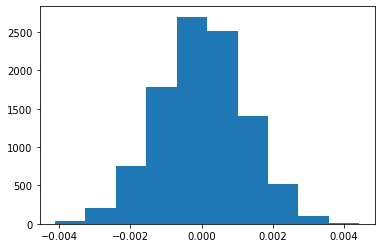

In [26]:
p_diffs=np.array(p_diffs)
std=p_diffs.std()
plt.hist(p_diffs);
obs = df2[df2['group']=='treatment'].converted.mean() - df2[df2['group']=='control'].converted.mean()
print ("Observed value: ", obs)

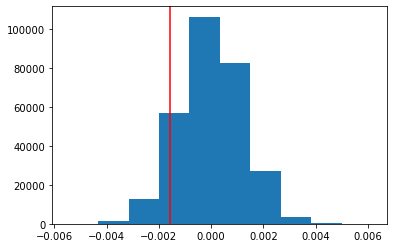

In [27]:
#simulate null hypothesis
null_vals=np.random.normal(0,std,df2.shape[0])
plt.hist(null_vals);
plt.axvline(obs,color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
((p_diffs) > obs).mean()

0.9074

**j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

## Reflection 
<p style="color:blue;font-size:20px;line-height:130%;font-family:Times New Roman;font-weight: bold;">
The value we just calculated is called the p-value and from this value along with the error rate we can actually assess our hypothesis  to see if we can actually assume our findings statistically significant. This value is actually the probabilty we get a difference of more than zero between the new and old page success rate under the null hypothesis(old page has the same convergence if not better than the new one). So if we assume an error rate of 5% this would lead to failing in rejecting the null hypothesis as there is a big chance ( around 92% probability ) to get this difference value observed under the null hypothesis.
<p style="color:blue;font-size:20px;line-height:130%;font-family:Times New Roman;font-weight: bold;">
P(p_diff>=-0.001578|$H_{0}$)= 90.74%

100%|██████████| 10000/10000 [12:49<00:00, 12.99it/s]

observed difference:  -0.0015782389853555567
pval: 0.9008410648900146


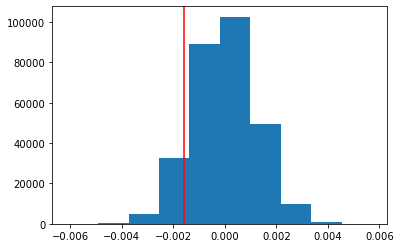

In [29]:
from tqdm import tqdm

#full approach
#assuming all of our cleaned data to be our sample data we get the observed difference 
obs_diff=obs

#create diffs list
diffs=[]
#Bootstrap sampling
for i in tqdm( range(10000) ):
    sample=df2.sample(df2.shape[0],replace=True)
    p_old= sample[sample['group']=='control'].converted.mean()
    p_new= sample[sample['group']=='treatment'].converted.mean()  
    diffs.append(p_new-p_old)
    

std=np.std(diffs)
print('observed difference: ', obs_diff)
#simulate sample under null hypothesis
null_vals=np.random.normal(0,std,df2.shape[0])
plt.hist(null_vals)
plt.axvline(obs_diff,color='r')
#calculate p-value
print('pval:', (null_vals > obs_diff).mean() )

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page'] == 'old_page']['converted'].sum()
convert_new = df2[df2['landing_page'] == 'new_page']['converted'].sum()
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
count = np.array([convert_new,convert_old])
nobs = np.array([n_new,n_old])
stat, pval = sm.stats.proportions_ztest(count,nobs,value=0,alternative='larger')
#verify ztest by trial
stat, std*stat  , pval

(-1.3109241984234394, -0.0016016968217642377, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

## Reflection
<p style="color:blue;font-size:20px;line-height:130%;font-family:Times New Roman;font-weight: bold;">
The z score means that the observation is (-1.31) std away from the mean and the oberved p_diff is (std*stat)+muo=-0.0016 and the p-value means that the probabilty of observing this statistic under the null hypothisis is 90% , P(observed statistic | ($h_{0}$ ) = 0.905 which means we failed to reject the null hypothesis and we should stick to it for now.This is consistant with our result in the previous parts

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

## Reflection
<p style="color:blue;font-size:30px;line-height:130%;font-family:Times New Roman;font-weight: bold;">
logistic regression to predict the log likelihood.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2=df.copy()
df2['intercept']=1
df2[['control','ab_page']]=pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=model.fit()


Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
display(result.summary2())


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              215704.9004
Date:               2021-08-05 21:53 BIC:              215726.0864
No. Observations:   294478           Log-Likelihood:   -1.0785e+05
Df Model:           1                LL-Null:          -1.0785e+05
Df Residuals:       294476           LLR p-value:      0.21611    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9887    0.0080  -248.2967  0.0000  -2.0044  -1.9730
ab_page      -0.0140    0.0114    -1.2369  0.2161  -0.0363   0.0082
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

## Reflection
<p style="color:blue;font-size:20px;line-height:130%;font-family:Times New Roman;font-weight: bold;">
The p-value associated with ab_page is 0.216 and its different from partII because this time the null hypothesis is different. It is simply that this variable wont have any significant effect on the dependent variable(Beta_i=0) and the alternative is that it would have a significant effect on the dependent variable(Beta_i!=0). while in part two it was related to the difference in P where 
<p style="color:blue;font-size:26px;line-height:130%;font-family:Times New Roman;font-weight: bold;">
$H_0: p_{new}-p_{old} <=0 $
<p style="color:blue;font-size:26px;line-height:130%;font-family:Times New Roman;font-weight: bold;">
$H_1: p_{new}-p_{old} >0 $


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

## Reflection
<p style="color:blue;font-size:20px;line-height:130%;font-family:Times New Roman;font-weight: bold;">
Adding new valriables specially that have some kind of correlation with our dependent variable should be good for our model but we should always watchout for the possible errors like Multi-collinearity which is very clear here with the landed page and group as there are the same each individual from the treatment group should receive the new page and the old page for the control group.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
df_c=pd.read_csv('countries.csv')
df_c
df_new=df2.merge(df_c,left_on='user_id',right_on='user_id',how='inner')
# df_new=df_new.dropna()
display(df_new['country'].unique())
df_new[['CA', 'UK', 'US']]=pd.get_dummies(df_new['country'])
df_new
df_new['intercept']=1
model=sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK']])
result=model.fit()
display(result.summary())



array(['US', 'CA', 'UK'], dtype=object)

Optimization terminated successfully.
         Current function value: 0.366238
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294474
Method:                           MLE   Df Model:                            3
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:               1.911e-05
Time:                        21:53:42   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2487
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9892      0.009   -225.246      0.000      -2.007      -1.972
ab_page       -0.0140      0.011     -1.234      0.217      -0.036       0.008
CA            -0.0357      0.027     -1.339      0.181      -0.088       0.017
UK             0.0093      0.013      0.701      0.483      -0.017       0.035
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [36]:
df_new['c_p1']=df_new['ab_page']*df_new['CA']
df_new['c_p2']=df_new['ab_page']*df_new['UK']

model=sm.OLS(df_new['converted'],df_new[['intercept','ab_page','CA','UK','c_p1','c_p2']])
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.210
Date:                Thu, 05 Aug 2021   Prob (F-statistic):              0.301
Time:                        21:53:42   Log-Likelihood:                -86474.
No. Observations:              294478   AIC:                         1.730e+05
Df Residuals:                  294472   BIC:                         1.730e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1206      0.001    119.239      0.000       0.119       0.123
ab_page       -0.0019      0.001     -1.332      0.183      -0.005       0.001
CA            -0.0013      0.004     -0.323      0.747      -0.009       0.006
UK            -0.0004      0.002     -0.183      0.855      -0.004       0.004
c_p1          -0.0048      0.006     -0.873      0.383      -0.016       0.006
c_p2           0.0027      0.003      0.963      0.336      -0.003       0.008
==============================================================================
Omnibus:                   127163.865   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           419269.975
Skew:                           2.344   Prob(JB):                         0.00
Kurtosis:                       6.493   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary
<p style="color:blue;font-size:20px;line-height:130%;font-family:Times New Roman;font-weight: bold;">
So it appears that none of the considered values are actually statistically significat for our dependent value (conversion rate) even when adding country variables or considering a relation between the country and the loaded page all of them tend to have a p-value of more than 10% which is not enough to reject H_{0} stating that these variables aren't usefull for our prediction.